# Example Machine Learning Workflow

This is an example of using Scikit Learn to train a very basic linear regression model.

You can use it as a starting point for your own work on the exercise.



## A toy problem

Let's load some example data and train a linear regression model on it.

In [0]:
!pip install --upgrade git+https://github.com/ComputeCanada/ml-workshop-helper.git

  Cloning https://github.com/ComputeCanada/ml-workshop-helper.git to /tmp/pip-req-build-mxc53rt9
  Running command git clone -q https://github.com/ComputeCanada/ml-workshop-helper.git /tmp/pip-req-build-mxc53rt9
  Created wheel for ml-helper: filename=ml_helper-1.0.1556912907-cp36-none-any.whl size=143094 sha256=593ed355d6fd2c9f29ec93a2aa2e0fb597662b3d088f47732b261f675353b85b
  Stored in directory: /tmp/pip-ephem-wheel-cache-980wsuo7/wheels/8f/bf/91/772626f0f6a131228a4dfe5d7bdddb478d1f209e771500888f
Successfully built ml-helper


In [0]:
# some helper code to keep things succinct
from ml_helper import helper

In [0]:
# generate some data
x, y = helper.gen_example_samples(seed=2001)
# learn this function!
from sklearn.model_selection import train_test_split
x_tr, x_v, y_tr, y_v = train_test_split(x, y)


We load the data and split it into training and validation subsets. The idea is to reserve some data as "unseen", so that we can check how well our model **generalizes** to unseen information from the same input distribution. Otherwise the model would **overfit to the training set** -- basically memorize the answers without "understanding". More on this later.

## A Toy Solution
We can use scikit learn to fit a linear model to the data in one line.

In [0]:
# scikit learn contains a lot of out of the box models
# let's use the most basic model there is, linear regression
from sklearn.linear_model import LinearRegression

# most of the use the .fit interface
model = LinearRegression().fit(x_tr, y_tr)

Let's see how we did with the build-in model evaluation functions.

In [0]:
# We want to see how well our model performs.
# We evaluate the loss on the training set and the test set.
# For the linear model, these scores are the R^2 values.
score_train = model.score(x_tr, y_tr)
score_validation = model.score(x_v, y_v)

print("Training score:", score_train)
print("Validation score:", score_validation)

Training score: 0.5664160423623134
Validation score: -0.8817861136828289


## A Better Solution

In our rush to fit a model, we didn't actually look at the data we were working with! Does what we are doing make sense?



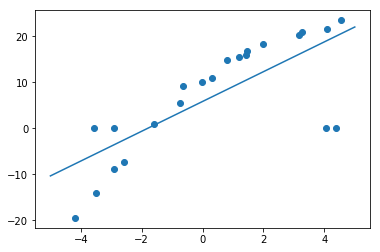

In [0]:
# Let's look at the data
import matplotlib.pyplot as plt
import numpy as np

# scatter creates a scatterplot between the first and second arguments
plt.scatter(x_tr, y_tr)
# linspace generates an evenly spaced sequence
linspace = np.linspace(-5, 5, num=1000)
# coef_ gives the learned coefficients, in order of their monomial degree
fitted = model.coef_[0] * linspace + model.intercept_
# plot creates a line plot
plt.plot(linspace, fitted)

We can see two problems:


1.   The trend is not exactly linear
2.   There are some outliers

The first one means our model will never be a perfect fit for the dataset -- **this is normal and acceptable**, since the exact functional form is often unknown and unknowable.

The second, however, can be fixed with some targeted cleanup of the data. **We have to be careful cleaning the data, lest we remove useful information**. In this case, we can use advace knowledge that the dataset has outliers to clean it with a good conscience. Often, this is a judgment call.



In [0]:
# let's see what's wrong
print(y_tr)

[  0.83630155  23.44571731   5.43905351  -8.90051802  16.77498727
  15.50162594  18.25084701   0.           9.09380463  -7.27926867
  21.53327181  20.95779018 -19.45309033   0.          10.00857224
   0.          14.84583983  10.95109565 -14.07366682   0.
  20.19672959  15.92046232]


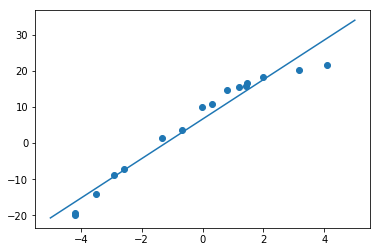

In [0]:
# it looks like some samples are unnaturally zeroed. This must be some sort of measurement error:
nonzeros = np.where(~np.isclose(y, 0))[0]

# we clean the whole dataset and re-split it
y = y[nonzeros]
x = x[nonzeros]

x_tr, x_v, y_tr, y_v = train_test_split(x, y)

# finally, we can fit the model again with the cleaned data
model = LinearRegression().fit(x_tr, y_tr)
plt.scatter(x_tr, y_tr)
fitted = model.coef_[0] * linspace + model.intercept_
plt.plot(linspace, fitted)

In [0]:
score_train = model.score(x_tr, y_tr)
score_validation = model.score(x_v, y_v)

print("Training score:", score_train)
print("Validation score:", score_validation)

Training score: 0.9535055698484012
Validation score: 0.8519878515206737


Much better!



## Can we do even better?

We can also expand the feature set to our linear regression: instead of fitting just X, we can also fit X^2. Yes, this is possible using linear regression -- linear in this case means the input features (X) and the output (y) are related linearly. But we can apply non-linear transformations to the features and add them as a new feature!


In [0]:
# we can expand the set of features

# we add the square of X as a new column with hstack
x_new = np.hstack([x, x**2])
print(x_new[:5])

[[-3.32874357 11.08053376]
 [-4.19001963 17.55626451]
 [ 1.20858854  1.46068626]
 [-0.74398032  0.55350672]
 [-2.57965378  6.65461364]]


In [0]:
# we regenerate our training and validation set
x_tr, x_v, y_tr, y_v = train_test_split(x_new, y)

# and fit and score the model
model.fit(x_tr, y_tr)
score_train = model.score(x_tr, y_tr)
score_validation = model.score(x_v, y_v)

print("Training score:", score_train)
print("Validation score:", score_validation)

Training score: 0.9940177477236368
Validation score: 0.9969216943325973


.99 R^2, the fit is almost perfect! Let's visualize it:

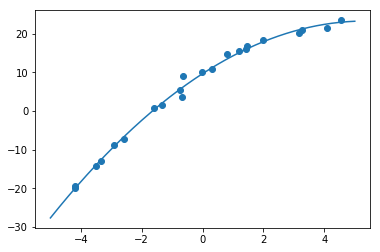

In [0]:
linspace = np.linspace(-5, 5, num=200)
# we can square the linear range, as numpy supports arithemtic on arrays
linspace2 = linspace ** 2

plt.scatter(x_new[:, 0], y)
plt.plot(linspace, model.coef_[0] * linspace + model.coef_[1] * linspace2 + model.intercept_ )

## Conclusion
The transformations and cleaning you will have to do are much more complex than this, but the core workflow is always the same:


1.   Look at your data
2.   Apply cleaning and normalization
3. Train your model
4. Evaluate your model
5. If not satisfied, refine your model or your data transforms and go to 2.
